<a href="https://colab.research.google.com/github/Labdhiiii/GIT-Learning/blob/master/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [ ]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words("english"))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
twitter_data=pd.read_csv(r"C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\training.1600000.processed.noemoticon.csv",encoding="ISO-8859-1")

In [ ]:
twitter_data.shape

(1599999, 6)

In [ ]:
twitter_data.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [ ]:
column_names=['target','id','date','flag','user','text']
twitter_data=pd.read_csv(r"C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\training.1600000.processed.noemoticon.csv",names=column_names,encoding="ISO-8859-1")

In [ ]:
twitter_data.shape

(1600000, 6)

In [ ]:
twitter_data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
twitter_data.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
twitter_data['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

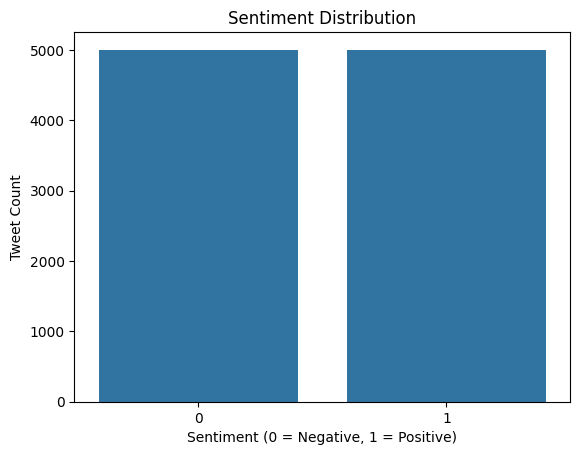

In [ ]:
# Visualize sentiment distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='target', data=twitter_data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Tweet Count')
plt.show()

In [ ]:
twitter_data.replace({'target':{4:1}},inplace=True)

In [ ]:
twitter_data['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

0-->Negative
1-->Positive

Stemming: Process of reducing a word to its Root Word.

In [ ]:
port_stem=PorterStemmer()

In [ ]:
twitter_data = twitter_data.sample(10000, random_state=42)

In [ ]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [ ]:
twitter_data['stemmed_content']=twitter_data['text'].apply(stemming)

In [ ]:
print(twitter_data[['target','stemmed_content']])

         target                                    stemmed_content
541200        0                          chrishasboob ahhh hope ok
750           0                  misstoriblack cool tweet app razr
766711        0  tiannachao know famili drama lame hey next tim...
285055        0  school email open geographi stuff revis stupid...
705995        0                               upper airway problem
...         ...                                                ...
965972        1  sister cheyenn birthday parti today gonna much...
1193436       1                                      addiek welcom
896390        1  rebekahmaylen serious gal make nervou parti th...
544127        0  sarahmascara thank want chicken cheesecak toge...
117202        0  kutefan sadli probabl true tri trident competi...

[10000 rows x 2 columns]


In [ ]:
X= twitter_data['stemmed_content'].values
Y= twitter_data['target'].values

Training and Testing

In [ ]:
X_train,X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,stratify=Y, random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(10000,) (8000,) (2000,)


In [ ]:
print(X_train)

['misschrii know celebr yet lol excit' 'mani mask festiv'
 'g mornin everyon feelin bit better morn' ... 'jerquiaga keep breath'
 'emeraldangeluk uk terrtenti downpour oh joy'
 'tracecyru http twitpic com ea still sweeter']


In [ ]:
print(X_test)

['love sunni day fife today shame work'
 'punch lever thing fall back onto sensor measur strength punch could never beat hayami'
 'cougar privaci threaten surveil increas http bit ly ayvio sorri help one'
 ... 'sunbath min got slight tan'
 'lydia shoe die pl buy wholesal amp sell pl'
 'cbryant fun ps come work today feel good']


Converting Textual data to numerical data

In [ ]:
vectorizer=TfidfVectorizer()

X_train=vectorizer.fit_transform(X_train)
X_test=vectorizer.transform(X_test)

#vectorizer provides importance to each word ie each word has a specific values
#happy gets 1 for eg and its repeated in positive tweets for x no of times
#so model understand if word happy is present its a positive tweet

In [ ]:
print(X_test)

  (0, 12699)	0.30291116166060084
  (0, 11549)	0.3255427938970638
  (0, 10926)	0.5223632296388445
  (0, 10040)	0.585667582875739
  (0, 6701)	0.31390849940491755
  (0, 2693)	0.29640902512278094
  (1, 11369)	0.1765680314060424
  (1, 10830)	0.28673466797931957
  (1, 9964)	0.31809489233900745
  (1, 9006)	0.6361897846780149
  (1, 8155)	0.27521884176369826
  (1, 7810)	0.1901724396344942
  (1, 7092)	0.31809489233900745
  (1, 3718)	0.23030901333452736
  (1, 2368)	0.1818895317421265
  (1, 945)	0.24104400286965785
  (1, 797)	0.15284493747909167
  (2, 11406)	0.433209293283729
  (2, 10515)	0.2530686271617773
  (2, 8141)	0.22143088328048627
  (2, 6776)	0.2976590325164716
  (2, 5298)	0.44769902116759536
  (2, 5091)	0.21004165140968126
  (2, 4863)	0.2829563353672412
  (2, 2366)	0.4681211456080206
  :	:
  (1995, 4013)	0.3692666173396314
  (1995, 2657)	0.43926229094353386
  (1995, 1355)	0.4216206564623268
  (1996, 11867)	0.4750048285918673
  (1996, 9994)	0.6822181654159876
  (1996, 8575)	0.5558316180201

Training Model using Logistic Regression

In [ ]:
model=LogisticRegression(max_iter=500)

In [ ]:
model.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

Model Evaluation

In [ ]:
# accuracy_score
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(Y_train,X_train_prediction)

In [ ]:
print("Accuracy Score on the training data",training_data_accuracy)


Accuracy Score on the training data 0.87275


Model is 87 percent accurate

In [ ]:
# accuracy_score
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(Y_test,X_test_prediction)

In [ ]:
print("Accuracy Score on the training data",test_data_accuracy)


Accuracy Score on the training data 0.732


Test data accuracy is 73 percent

Saving this trained model using Pickle

In [ ]:
import pickle

In [ ]:
filename="trained_model.sav"
pickle.dump(model,open(filename,'wb'))

Using the saved model for predictions

In [ ]:
loaded_model=pickle.load(open(r'C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\trained_model.sav','rb'))

In [ ]:
X_new=X_test[100]
print(Y_test[100])

prediction= model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print("Negative Tweet")
else:
    print("Positive Tweet")

1
[1]
Positive Tweet


In [ ]:
X_new=X_test[20]
print(Y_test[20])

prediction= model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print("Negative Tweet")
else:
    print("Positive Tweet")

0
[0]
Negative Tweet


In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
file_path = r'C:\Users\HP\Desktop\gsfc\Sem6\Internship\Sentiment_Analysis\training.1600000.processed.noemoticon.csv'
data = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
data.columns = ['target', 'id', 'date', 'flag', 'user', 'text']
data = data[['target', 'text']]

# Keep only positive (4) and negative (0)
data = data[data['target'].isin([0, 4])]
data['target'] = data['target'].apply(lambda x: 1 if x == 4 else 0)

# Clean text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r"@\w+", '', text)  # Remove mentions
    text = re.sub(r"#", '', text)  # Remove hashtags
    text = re.sub(r"[^\w\s]", '', text)  # Remove punctuation
    return text

data['text'] = data['text'].apply(clean_text)

# Optional: Use a sample to make training faster
data = data.sample(10000, random_state=42)

# Visualize sentiment distribution
sns.countplot(x='target', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment (0 = Negative, 1 = Positive)')
plt.ylabel('Tweet Count')
plt.show()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['target'], test_size=0.2, random_state=42)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vec, y_train)

# Evaluate model
y_pred = model.predict(X_test_vec)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# --------- Prediction ---------

def clean_input(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r"@\w+", '', text)
    text = re.sub(r"#", '', text)
    text = re.sub(r"[^\w\s]", '', text)
    return text

def predict_sentiment(text):
    cleaned = clean_input(text)
    vec_text = vectorizer.transform([cleaned])
    prediction = model.predict(vec_text)[0]
    label = "Positive 😊" if prediction == 1 else "Negative 😠"
    print(f"\nTweet: {text}")
    print(f"Predicted Sentiment: {label}")

# Test with your own inputs
predict_sentiment("I love this product! Totally worth it.")
predict_sentiment("Worst experience ever. Wouldn’t recommend.")
predict_sentiment("It's fine, not too great, not too bad.")
predict_sentiment("Service was slow and staff was rude.")
predict_sentiment("Amazing experience, will come again!")

